In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
import missingno as msno
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")

In [3]:
patient_indonesia = pd.read_csv("patient.csv")

In [4]:
patient_indonesia

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...,...
888,889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,892,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN


In [5]:
patient_indonesia = patient_indonesia[patient_indonesia["age"].notnull()]
#age에 data가 없는 열을 지움

In [6]:
patient_indonesia

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...,...
166,167,male,48.0,indonesia,Jawa Timur,isolated,NaN,17-Mar-20,NaN,NaN,NaN
167,168,male,38.0,indonesia,DKI Jakarta,isolated,NaN,17-Mar-20,NaN,NaN,NaN
168,169,female,44.0,indonesia,DKI Jakarta,isolated,NaN,17-Mar-20,NaN,NaN,NaN
169,170,male,32.0,indonesia,DKI Jakarta,isolated,NaN,17-Mar-20,NaN,NaN,NaN


In [7]:
column_name = ["patient_id", "gender", "age", "current_state"]

In [8]:
patient_indonesia = patient_indonesia[column_name]
#필요없는 column 지움

In [9]:
patient_indonesia

,patient_id,gender,age,current_state
0,1,female,31.0,released
1,2,female,64.0,released
2,3,female,33.0,released
3,4,female,34.0,isolated
4,5,male,55.0,isolated
...,...,...,...,...
166,167,male,48.0,isolated
167,168,male,38.0,isolated
168,169,female,44.0,isolated
169,170,male,32.0,isolated


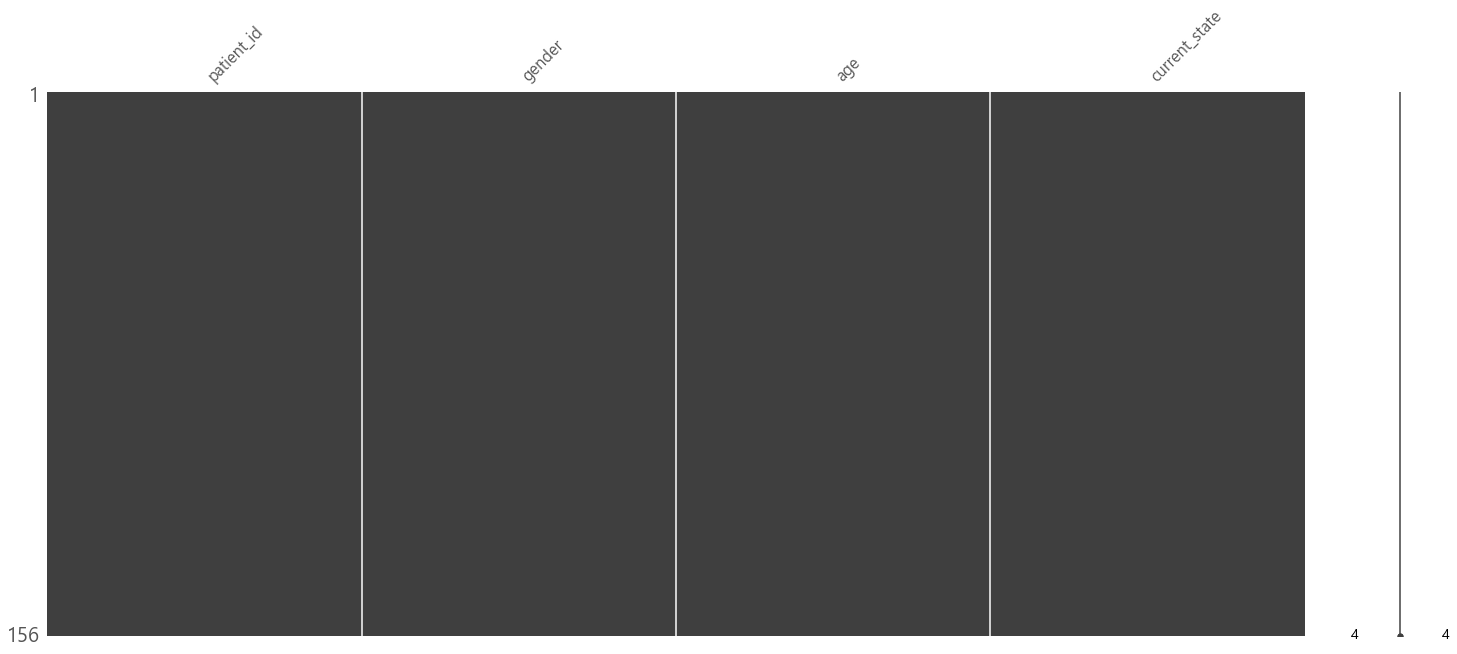

In [10]:
msno.matrix(patient_indonesia)
#공백있는지 확인

In [11]:
patient_indonesia["age"]

0      31.0
1      64.0
2      33.0
3      34.0
4      55.0
       ... 
166    48.0
167    38.0
168    44.0
169    32.0
170    67.0
Name: age, Length: 156, dtype: float64

In [12]:
patient_indonesia["age"] = patient_indonesia["age"].astype(str)
#age를 문자열 형태로 변환

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
patient_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 170
Data columns (total 4 columns):
patient_id       156 non-null int64
gender           156 non-null object
age              156 non-null object
current_state    156 non-null object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [14]:
patient_indonesia[patient_indonesia["age"].str.startswith("6")]
#6으로 시작하는 age값만 나타냄

,patient_id,gender,age,current_state
1,2,female,64.0,released
41,42,male,66.0,isolated
46,47,male,61.0,isolated
50,51,male,60.0,isolated
58,59,male,63.0,isolated
71,72,female,65.0,deceased
74,75,male,64.0,isolated
75,76,male,64.0,isolated
77,78,female,69.0,isolated
79,80,female,65.0,isolated


In [15]:
patient_indonesia[patient_indonesia["age"].str.startswith("7")]

,patient_id,gender,age,current_state
19,20,female,70.0,isolated
22,23,female,73.0,isolated
65,66,male,73.0,isolated
72,73,female,70.0,isolated
83,84,male,78.0,isolated
99,100,female,70.0,isolated
115,116,male,72.0,deceased
119,120,male,74.0,isolated
121,122,female,74.0,isolated
139,140,male,71.0,isolated


In [16]:
patient_indonesia[patient_indonesia["age"].str.startswith("8")]

,patient_id,gender,age,current_state
29,30,male,85.0,isolated
37,38,female,80.0,isolated
68,69,male,80.0,isolated
80,81,male,86.0,isolated
157,158,female,80.0,isolated


In [17]:
patient_indonesia_elder = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("6")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("7")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("8")]])
#인도네시아 노년층 데이터 병합

In [18]:
patient_indonesia_elder

,patient_id,gender,age,current_state
1,2,female,64.0,released
41,42,male,66.0,isolated
46,47,male,61.0,isolated
50,51,male,60.0,isolated
58,59,male,63.0,isolated
71,72,female,65.0,deceased
74,75,male,64.0,isolated
75,76,male,64.0,isolated
77,78,female,69.0,isolated
79,80,female,65.0,isolated


In [19]:
patient_indonesia_elder["age"] = patient_indonesia_elder["age"].astype(float)
#문자열을 다시 실수형으로 변환

In [20]:
patient_indonesia_elder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 157
Data columns (total 4 columns):
patient_id       38 non-null int64
gender           38 non-null object
age              38 non-null float64
current_state    38 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [21]:
patient_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 170
Data columns (total 4 columns):
patient_id       156 non-null int64
gender           156 non-null object
age              156 non-null object
current_state    156 non-null object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [22]:
patient_indonesia["age"] = patient_indonesia["age"].astype(float)

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
patient_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 170
Data columns (total 4 columns):
patient_id       156 non-null int64
gender           156 non-null object
age              156 non-null float64
current_state    156 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


In [24]:
patient_indonesia_baby = patient_indonesia[patient_indonesia["age"] < 10.0]
#10세 이하만 추출

In [25]:
patient_indonesia_baby

,patient_id,gender,age,current_state
48,49,male,3.0,isolated
53,54,male,2.0,isolated


In [26]:
patient_indonesia_elder

,patient_id,gender,age,current_state
1,2,female,64.0,released
41,42,male,66.0,isolated
46,47,male,61.0,isolated
50,51,male,60.0,isolated
58,59,male,63.0,isolated
71,72,female,65.0,deceased
74,75,male,64.0,isolated
75,76,male,64.0,isolated
77,78,female,69.0,isolated
79,80,female,65.0,isolated


In [27]:
patient_indonesia_elder["current_state"].value_counts()

isolated    33
deceased     4
released     1
Name: current_state, dtype: int64

In [28]:
patient_indonesia_elder["lethality"] = 4/38 * 100
#치사율 데이터 생성

In [29]:
patient_indonesia_elder

,patient_id,gender,age,current_state,lethality
1,2,female,64.0,released,10.526316
41,42,male,66.0,isolated,10.526316
46,47,male,61.0,isolated,10.526316
50,51,male,60.0,isolated,10.526316
58,59,male,63.0,isolated,10.526316
71,72,female,65.0,deceased,10.526316
74,75,male,64.0,isolated,10.526316
75,76,male,64.0,isolated,10.526316
77,78,female,69.0,isolated,10.526316
79,80,female,65.0,isolated,10.526316


In [30]:
patient_indonesia

,patient_id,gender,age,current_state
0,1,female,31.0,released
1,2,female,64.0,released
2,3,female,33.0,released
3,4,female,34.0,isolated
4,5,male,55.0,isolated
...,...,...,...,...
166,167,male,48.0,isolated
167,168,male,38.0,isolated
168,169,female,44.0,isolated
169,170,male,32.0,isolated


In [31]:
patient_indonesia["age"] = patient_indonesia["age"].astype(str)

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
patient_indonesia_young = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("1")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("2")] 
                                    ])
#1, 2 로 시작하는 age값 추출

In [33]:
patient_indonesia_young

,patient_id,gender,age,current_state
12,13,female,16.0,released
15,16,female,17.0,isolated
156,157,male,19.0,isolated
9,10,male,29.0,isolated
32,33,male,29.0,isolated
44,45,female,29.0,isolated
52,53,female,24.0,isolated
53,54,male,2.0,isolated
54,55,female,26.0,isolated
56,57,female,27.0,isolated


In [34]:
patient_indonesia_young.drop(53, axis=0, inplace=True)
#행이름 53 삭제

In [35]:
patient_indonesia_young

,patient_id,gender,age,current_state
12,13,female,16.0,released
15,16,female,17.0,isolated
156,157,male,19.0,isolated
9,10,male,29.0,isolated
32,33,male,29.0,isolated
44,45,female,29.0,isolated
52,53,female,24.0,isolated
54,55,female,26.0,isolated
56,57,female,27.0,isolated
59,60,female,25.0,isolated


In [36]:
patient_indonesia_middle = pd.concat([patient_indonesia[patient_indonesia["age"].str.startswith("3")], 
                                     patient_indonesia[patient_indonesia["age"].str.startswith("4")], 
                                      patient_indonesia[patient_indonesia["age"].str.startswith("5")]
                                    ])
#3, 4, 5 로 시작하는 age값 추출

In [37]:
patient_indonesia_middle

,patient_id,gender,age,current_state
0,1,female,31.0,released
2,3,female,33.0,released
3,4,female,34.0,isolated
5,6,male,36.0,released
11,12,male,31.0,isolated
...,...,...,...,...
152,153,female,55.0,isolated
155,156,male,59.0,isolated
159,160,male,52.0,isolated
160,161,female,56.0,isolated


In [38]:
patient_indonesia_middle.head(50)

,patient_id,gender,age,current_state
0,1,female,31.0,released
2,3,female,33.0,released
3,4,female,34.0,isolated
5,6,male,36.0,released
11,12,male,31.0,isolated
21,22,female,36.0,isolated
26,27,male,33.0,isolated
27,28,male,37.0,isolated
35,36,female,36.0,deceased
42,43,male,34.0,isolated


In [39]:
patient_indonesia_middle.drop(48, axis=0, inplace=True)
#행이름 48 삭제

In [40]:
patient_indonesia_middle

,patient_id,gender,age,current_state
0,1,female,31.0,released
2,3,female,33.0,released
3,4,female,34.0,isolated
5,6,male,36.0,released
11,12,male,31.0,isolated
...,...,...,...,...
152,153,female,55.0,isolated
155,156,male,59.0,isolated
159,160,male,52.0,isolated
160,161,female,56.0,isolated


In [41]:
patient_indonesia_middle["current_state"].value_counts()

isolated    78
deceased    11
released     6
Name: current_state, dtype: int64

In [42]:
patient_indonesia_middle["lethality"] = 11/(78+11+6) * 100
#치사율 계산

In [43]:
patient_indonesia_middle

,patient_id,gender,age,current_state,lethality
0,1,female,31.0,released,11.578947
2,3,female,33.0,released,11.578947
3,4,female,34.0,isolated,11.578947
5,6,male,36.0,released,11.578947
11,12,male,31.0,isolated,11.578947
...,...,...,...,...,...
152,153,female,55.0,isolated,11.578947
155,156,male,59.0,isolated,11.578947
159,160,male,52.0,isolated,11.578947
160,161,female,56.0,isolated,11.578947


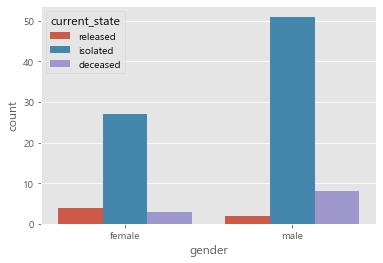

In [44]:
sns_plot = sns.countplot(data=patient_indonesia_middle, x="gender", hue="current_state")
fig = sns_plot.get_figure()
fig.savefig("indonesia30-50 gender.png")
#30~50대 성별 current state 나타낸 그래프

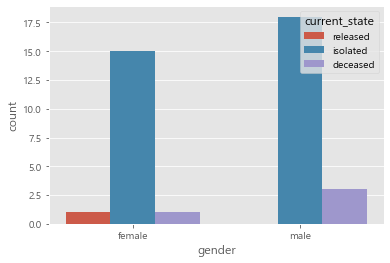

In [45]:
sns_plot = sns.countplot(data=patient_indonesia_elder, x="gender", hue="current_state")
fig = sns_plot.get_figure()
fig.savefig("indonesia60-80 gender.png")
#60~80대 성별 current state나타낸 그래프

In [ ]:
#3/2~3/26일까지의 data밖에 없음
#그런데 치사율이 10퍼가 넘는것을 보면 꽤 위험한 질병같음

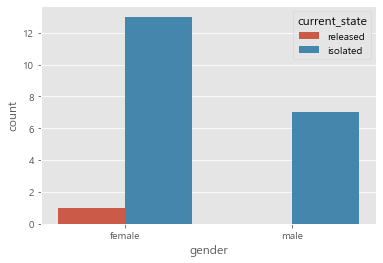

In [46]:
sns_plot = sns.countplot(data=patient_indonesia_young, x="gender", hue="current_state")
fig = sns_plot.get_figure()
fig.savefig("indonesia 10-20 gender.png")
#30~50대 성별 current state 나타낸 그래프